***SIMPLE LINEAR REGRESSION***


In [5]:
# Step 1 : importing the libraries
import numpy as np # for handling numerical data
import pandas as pd
import matplotlib.pyplot as plt #for data visualization 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#for building the regression model
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score 
import statsmodels.api as sm # For OLS(ordinary Leat Squares)Regression
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# Step 2: Define the dataset (Experience in years and corresponding Salary in $1000s)

np.random.seed(42)  # Ensuring reproducibility of random noise
 
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)  # Independent variable (Experience)

true_salaries = np.array([30, 35, 40, 45, 50, 55, 60, 65, 70, 75])  # True salary values
 

In [7]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

In [16]:
degree=2
poly=PolynomialFeatures(degree=degree)
X_poly=poly.fit_transform(X)

In [18]:
# Step 4 Train the model using dataset
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [20]:
slope=model.coef_[0]

In [22]:
intercept=model.intercept_

In [24]:
# Step 6 : Display the equation of the line 
print(f"Equation of the line : Y = {slope:.2f}X + {intercept:.2f}")

Equation of the line : Y = 4.97X + 27.43


In [26]:
X_ols=sm.add_constant(X_poly)
ols_model=sm.OLS(Y,X_ols).fit()
print("\nOLS Regression Summary:\n")
print(ols_model.summary())


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        10:49:02   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [20]:
# Step 7 : Predict values using the model
Y_pred = model.predict(X)

***model evaluating matrix***

***1.Mean Squared Error***


In [23]:
mse =  mean_squared_error(Y,Y_pred)
print(f"Mean Squared Error:{mse:.2f}")

Mean Squared Error:11.75


***2.Mean Absolute Error***

mae=mean_absolute_error(Y,Y_pred)
print(f"Mean Absolute Error : {mae:.2f}")

***3. Root Mean Square Error***

In [35]:
rmse=np.sqrt(mse)
print(f"Root Mean Square Error : {rmse:.2f}")

Root Mean Square Error : 3.43


***4. R-Squared (r2)***

In [38]:
r2 = r2_score(Y,Y_pred)
print(f"R-squared (R^2):{r2:.2f}")

R-squared (R^2):0.95


***5. Adjusted R-Squared (R^2_adj)***

In [41]:
n = len(Y)
p=1
adj_r2 = 1-((1-r2)*(n-1)/(n-p-1))
print(f"Adusted R-squared : {adj_r2:.2f}")

Adusted R-squared : 0.94


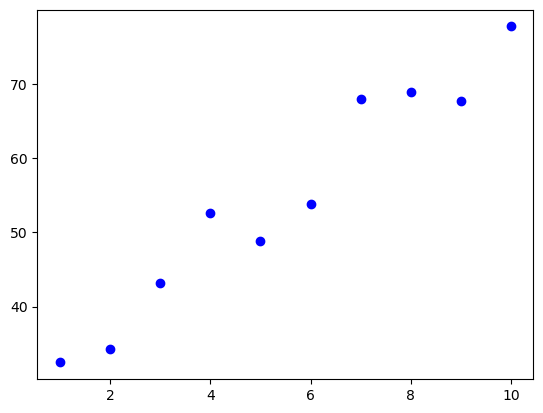

In [43]:
#Step 8 : plot the actual data points
plt.scatter(X, Y, color='blue', label='Actual Data')

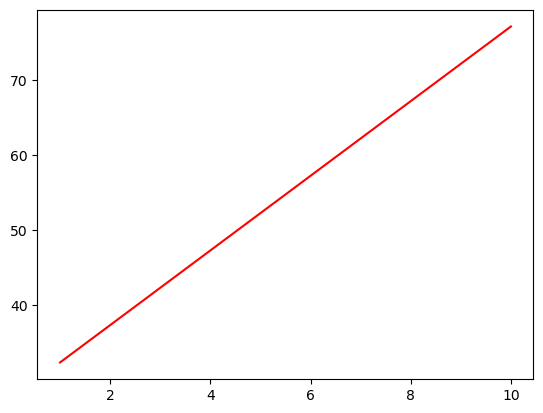

In [45]:
# Step 9 : plot the Regression Line(Best Fit Line)
plt.plot(X,Y_pred,color='red' ,label ='Best Fit Line')
# plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Plot regression line
# plt.xlabel('Years of Experience')
# plt.ylabel('Salary')
# plt.legend()
# plt.show()

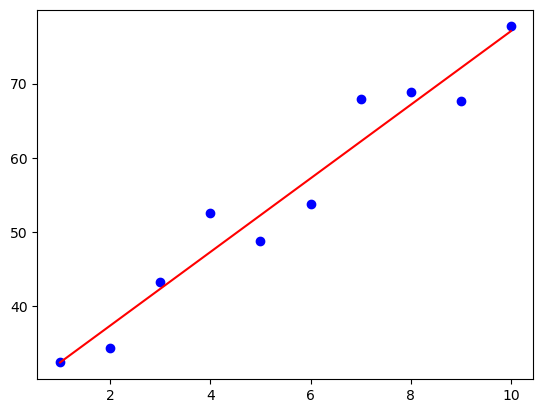

In [47]:
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X,Y_pred,color='red' ,label ='Best Fit Line')

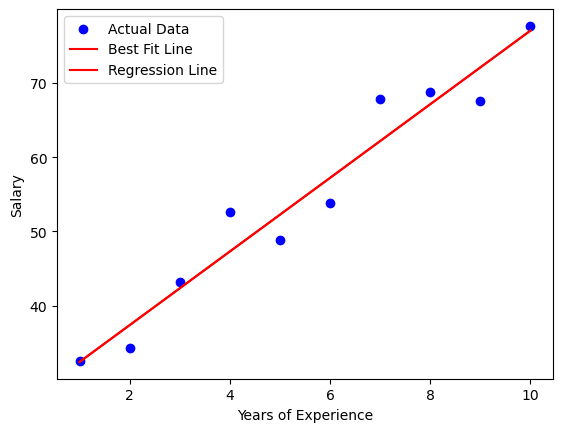

In [49]:
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X,Y_pred,color='red' ,label ='Best Fit Line')
plt.plot(X, model.predict(X), color='red', label='Regression Line')  # Plot regression line
# Step 10 : Add labels and legends
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
# Step 11 : Display the graph 
plt.show()

In [53]:
# User can input experience ,a nd the model will predict salary
while True:
    try:
        exp = float(input("\nEnter years of experience to predict salary for(or -1 to exit):"))
        if exp == -1:
            break
        predicted_salary = model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of experience : ${predicted_salary:.2f}K")
    except ValueError:
        print("Please enter a valid number!")



Enter years of experience to predict salary for(or -1 to exit): 5


Predicted Salary for 5.0 years of experience : $52.26K



Enter years of experience to predict salary for(or -1 to exit): 4


Predicted Salary for 4.0 years of experience : $47.29K



Enter years of experience to predict salary for(or -1 to exit): 90


Predicted Salary for 90.0 years of experience : $474.32K



Enter years of experience to predict salary for(or -1 to exit): 8797


Predicted Salary for 8797.0 years of experience : $43708.92K



Enter years of experience to predict salary for(or -1 to exit): -1
